In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
train_df=pd.read_csv('../input/tabular-playground-series-aug-2022/train.csv')
test_df=pd.read_csv('../input/tabular-playground-series-aug-2022/test.csv')
sub_df=pd.read_csv('../input/tabular-playground-series-aug-2022/sample_submission.csv')

In [9]:
train_df

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,26565,E,158.95,material_7,material_6,6,9,6,16,4,...,NaN,12.177,17.942,10.112,15.795,18.572,16.144,NaN,729.131,0
26566,26566,E,146.02,material_7,material_6,6,9,10,12,8,...,11.242,14.179,20.564,10.234,14.450,14.322,13.146,16.471,853.924,0
26567,26567,E,115.62,material_7,material_6,6,9,1,10,1,...,11.407,16.437,17.476,8.668,15.069,16.599,15.590,14.065,750.364,0
26568,26568,E,106.38,material_7,material_6,6,9,2,9,4,...,11.392,17.064,17.814,14.928,16.273,15.485,13.624,12.865,730.156,0


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26570 entries, 0 to 26569
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              26570 non-null  int64  
 1   product_code    26570 non-null  object 
 2   loading         26320 non-null  float64
 3   attribute_0     26570 non-null  object 
 4   attribute_1     26570 non-null  object 
 5   attribute_2     26570 non-null  int64  
 6   attribute_3     26570 non-null  int64  
 7   measurement_0   26570 non-null  int64  
 8   measurement_1   26570 non-null  int64  
 9   measurement_2   26570 non-null  int64  
 10  measurement_3   26189 non-null  float64
 11  measurement_4   26032 non-null  float64
 12  measurement_5   25894 non-null  float64
 13  measurement_6   25774 non-null  float64
 14  measurement_7   25633 non-null  float64
 15  measurement_8   25522 non-null  float64
 16  measurement_9   25343 non-null  float64
 17  measurement_10  25270 non-null 

In [92]:
train_df.drop(columns=['id','product_code','attribute_0','attribute_1','attribute_2','attribute_3','measurement_0','measurement_1','measurement_2'],axis=1,inplace=True)
train_df.head()

,loading,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,80.10,18.040,12.518,15.748,19.292,11.739,20.155,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,84.89,18.213,11.540,17.717,17.893,12.748,17.889,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,82.43,18.057,11.652,16.738,18.240,12.718,18.288,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,101.07,17.295,11.188,18.576,18.339,12.583,19.060,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,188.06,19.346,12.950,16.990,15.746,11.306,18.093,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


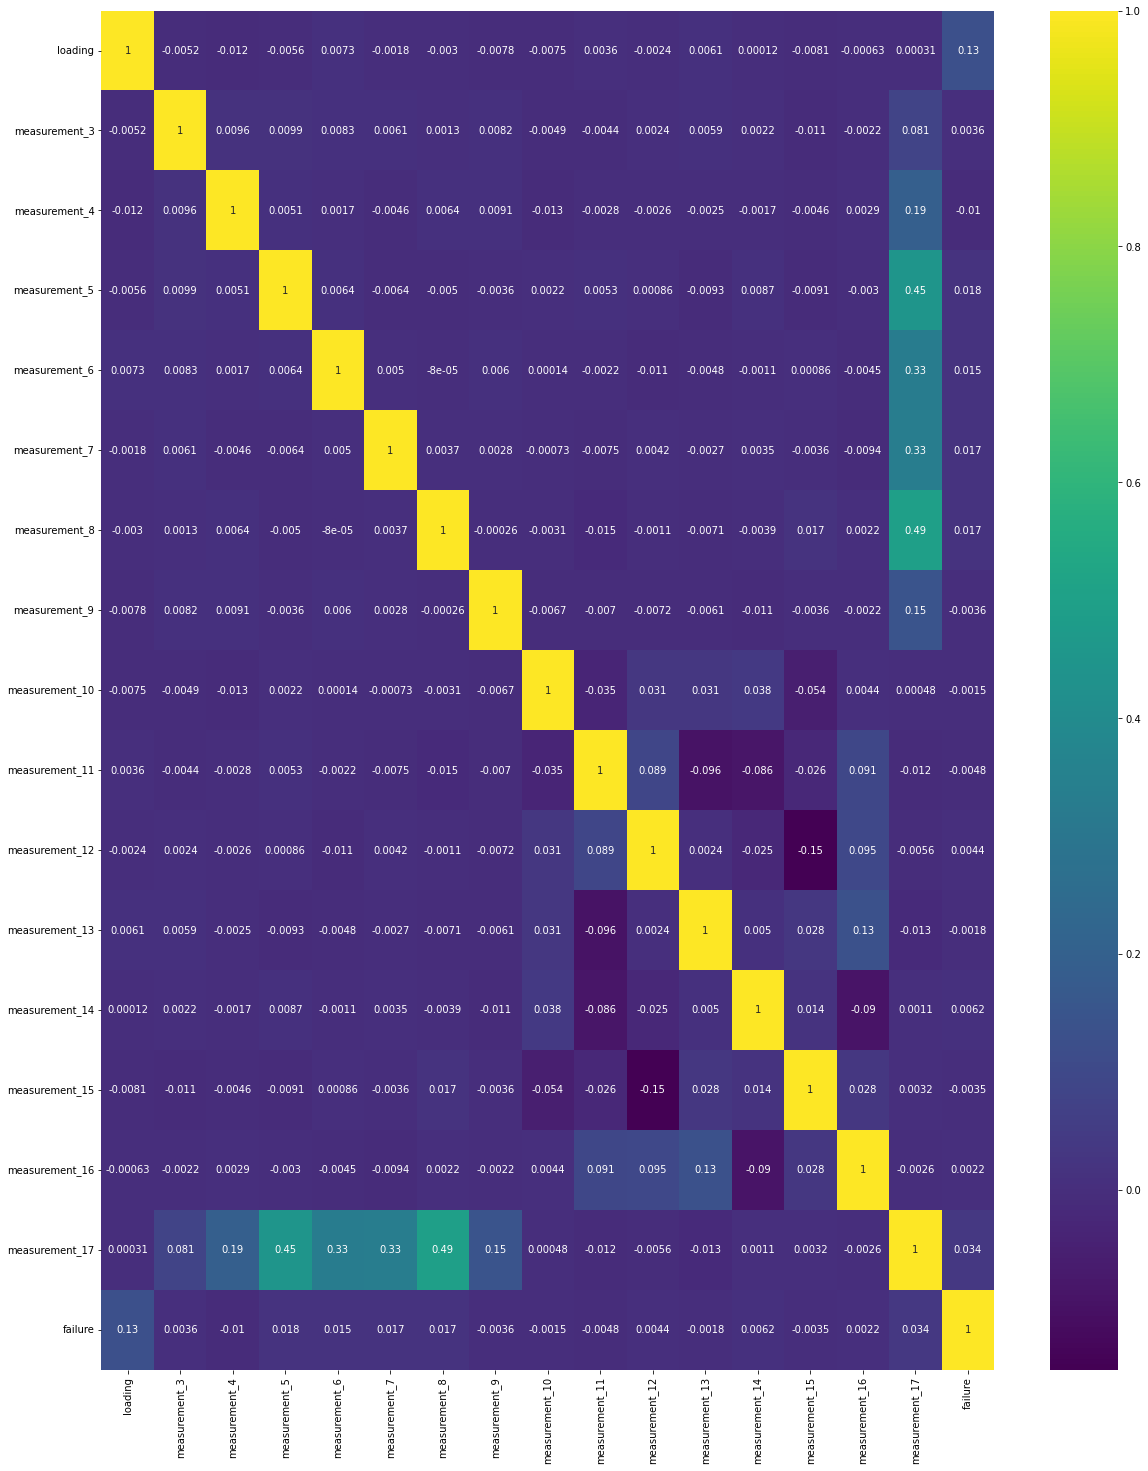

In [16]:
plt.figure(figsize=(20,25))
sns.heatmap(train_df.corr(),annot=True,cmap='viridis')
plt.show()

In [17]:
test_df

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,26570,F,119.57,material_5,material_6,6,4,6,9,6,...,18.654,10.802,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612
1,26571,F,113.51,material_5,material_6,6,4,11,8,0,...,19.368,12.032,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037
2,26572,F,112.16,material_5,material_6,6,4,8,12,4,...,17.774,11.743,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995
3,26573,F,112.72,material_5,material_6,6,4,8,11,10,...,18.948,11.790,18.165,16.163,10.933,15.501,15.667,12.620,16.111,594.301
4,26574,F,208.00,material_5,material_6,6,4,14,16,8,...,19.141,12.370,14.578,17.849,11.941,16.070,16.183,13.324,17.150,801.044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20770,47340,I,144.74,material_7,material_5,9,5,0,4,9,...,18.573,11.691,NaN,19.771,11.562,17.246,15.131,15.209,NaN,696.466
20771,47341,I,74.53,material_7,material_5,9,5,4,8,7,...,17.917,10.980,16.027,15.694,13.564,15.494,15.296,13.812,16.501,613.249
20772,47342,I,67.73,material_7,material_5,9,5,10,11,2,...,19.630,10.436,16.137,20.612,11.134,16.519,15.525,14.175,17.728,783.349
20773,47343,I,126.15,material_7,material_5,9,5,8,16,11,...,19.575,12.672,15.422,19.496,9.319,15.817,17.403,16.437,15.179,745.210


In [99]:
test_df.drop(columns=['id','product_code','attribute_0','attribute_1','attribute_2','attribute_3','measurement_0','measurement_1','measurement_2'],axis=1,inplace=True)
test_df.head()

,loading,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,119.57,19.305,10.178,17.534,18.168,11.598,18.654,10.802,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612
1,113.51,17.883,11.927,17.228,16.033,11.179,19.368,12.032,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037
2,112.16,18.475,10.481,16.619,18.189,12.126,17.774,11.743,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995
3,112.72,16.518,10.888,15.293,18.592,11.304,18.948,11.790,18.165,16.163,10.933,15.501,15.667,12.620,16.111,594.301
4,208.00,17.808,12.693,17.678,15.814,13.431,19.141,12.370,14.578,17.849,11.941,16.070,16.183,13.324,17.150,801.044


In [19]:
x=train_df.drop(columns='failure',axis=1)
y=train_df['failure']

In [20]:
x

,loading,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,80.10,18.040,12.518,15.748,19.292,11.739,20.155,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100
1,84.89,18.213,11.540,17.717,17.893,12.748,17.889,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057
2,82.43,18.057,11.652,16.738,18.240,12.718,18.288,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376
3,101.07,17.295,11.188,18.576,18.339,12.583,19.060,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282
4,188.06,19.346,12.950,16.990,15.746,11.306,18.093,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,158.95,16.301,13.259,18.068,15.505,10.865,19.354,NaN,12.177,17.942,10.112,15.795,18.572,16.144,NaN,729.131
26566,146.02,17.543,NaN,17.984,19.078,11.139,19.563,11.242,14.179,20.564,10.234,14.450,14.322,13.146,16.471,853.924
26567,115.62,15.670,11.535,16.778,18.385,11.630,19.279,11.407,16.437,17.476,8.668,15.069,16.599,15.590,14.065,750.364
26568,106.38,18.059,NaN,16.918,18.101,11.713,19.358,11.392,17.064,17.814,14.928,16.273,15.485,13.624,12.865,730.156


In [21]:
y

0        0
1        0
2        0
3        0
4        0
        ..
26565    0
26566    0
26567    0
26568    0
26569    0
Name: failure, Length: 26570, dtype: int64

In [35]:
from sklearn.impute import KNNImputer
knn=KNNImputer()

In [36]:
x_impute=knn.fit_transform(x)
x_impute

array([[ 80.1   ,  18.04  ,  12.518 , ...,  13.034 ,  14.684 , 764.1   ],
       [ 84.89  ,  18.213 ,  11.54  , ...,  14.395 ,  15.631 , 682.057 ],
       [ 82.43  ,  18.057 ,  11.652 , ...,  14.094 ,  17.946 , 663.376 ],
       ...,
       [115.62  ,  15.67  ,  11.535 , ...,  15.59  ,  14.065 , 750.364 ],
       [106.38  ,  18.059 ,  11.9218, ...,  13.624 ,  12.865 , 730.156 ],
       [131.2   ,  18.034 ,  11.431 , ...,  16.527 ,  17.89  , 602.354 ]])

In [37]:
x=pd.DataFrame(x_impute,columns=x.columns)
x

,loading,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,80.10,18.040,12.5180,15.748,19.292,11.739,20.155,10.6720,15.859,17.5940,15.193,15.029,15.489,13.034,14.6840,764.100
1,84.89,18.213,11.5400,17.717,17.893,12.748,17.889,12.4480,17.947,17.9150,11.755,14.732,15.425,14.395,15.6310,682.057
2,82.43,18.057,11.6520,16.738,18.240,12.718,18.288,12.7150,15.607,19.3088,13.798,16.711,18.631,14.094,17.9460,663.376
3,101.07,17.295,11.1880,18.576,18.339,12.583,19.060,12.4710,16.346,18.3770,10.020,15.250,15.562,16.154,17.1720,826.282
4,188.06,19.346,12.9500,16.990,15.746,11.306,18.093,10.3370,17.082,19.9320,12.428,16.182,12.760,13.153,16.4120,579.885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,158.95,16.301,13.2590,18.068,15.505,10.865,19.354,10.8382,12.177,17.9420,10.112,15.795,18.572,16.144,16.8082,729.131
26566,146.02,17.543,11.7098,17.984,19.078,11.139,19.563,11.2420,14.179,20.5640,10.234,14.450,14.322,13.146,16.4710,853.924
26567,115.62,15.670,11.5350,16.778,18.385,11.630,19.279,11.4070,16.437,17.4760,8.668,15.069,16.599,15.590,14.0650,750.364
26568,106.38,18.059,11.9218,16.918,18.101,11.713,19.358,11.3920,17.064,17.8140,14.928,16.273,15.485,13.624,12.8650,730.156


In [38]:
x.isnull().sum().sum()

0

In [39]:
test_df_impute=knn.transform(test_df)
test_df=pd.DataFrame(test_df_impute,columns=test_df.columns)
test_df.isnull().sum().sum()

0

In [22]:
y.value_counts()

0    20921
1     5649
Name: failure, dtype: int64

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lr=LogisticRegression()

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid={'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
            'solver' : ['liblinear', 'sag', 'saga'],
            'max_iter':[100,750,3000]
}

In [27]:
print(param_grid)

{'penalty': ['l1', 'l2', 'elasticnet', 'none'], 'solver': ['liblinear', 'sag', 'saga'], 'max_iter': [100, 750, 3000]}


In [42]:
import warnings
warnings.filterwarnings(action='ignore')
lr_grid=GridSearchCV(estimator=lr,param_grid=param_grid,cv=7)
lr_grid.fit(x,y)

GridSearchCV(cv=7, estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 750, 3000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['liblinear', 'sag', 'saga']})

In [43]:
lr_grid.best_score_

0.7872412578487623

In [44]:
best_grid=lr_grid.best_estimator_
best_grid

LogisticRegression(penalty='l1', solver='saga')

In [45]:
y_pred=best_grid.predict(test_df)

In [46]:
submission=pd.DataFrame({'id':sub_df['id'],'failure':y_pred})
submission

,id,failure
0,26570,0
1,26571,0
2,26572,0
3,26573,0
4,26574,0
...,...,...
20770,47340,0
20771,47341,0
20772,47342,0
20773,47343,0


In [47]:
submission['failure'].value_counts()

0    20748
1       27
Name: failure, dtype: int64

In [48]:
submission.to_csv('tps_august_2022.csv',index=None)

In [49]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [50]:
x_sm,y_sm=smote.fit_resample(x,y)

In [51]:
y_sm.value_counts()

0    20921
1    20921
Name: failure, dtype: int64

In [52]:
best_grid.fit(x_sm,y_sm)

LogisticRegression(penalty='l1', solver='saga')

In [54]:
y_pred2=best_grid.predict(test_df)
submission2=pd.DataFrame({'id':sub_df['id'],'failure':y_pred2})

In [56]:
submission2['failure'].value_counts(normalize=True)

0    0.585897
1    0.414103
Name: failure, dtype: float64

In [57]:
submission2.to_csv('tps_august_2022_2.csv',index=None)

In [61]:
from sklearn.linear_model import RidgeClassifier
ridge=RidgeClassifier(random_state=1001)

In [63]:
param_grid={'max_iter':[100,400,1200,3150],
            'tol':[2e-3,1e-4],
            'solver' : ['svd', 'cholesky', 'lsqr', 'sparse_cg','sag', 'saga', 'lbfgs']
            
        }

In [65]:
print(param_grid)

{'max_iter': [100, 400, 1200, 3150], 'tol': [0.002, 0.0001], 'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']}


In [66]:
ridge_grid=GridSearchCV(estimator=ridge,param_grid=param_grid,cv=6)

In [69]:
ridge_grid.fit(x_sm,y_sm)

GridSearchCV(cv=6, estimator=RidgeClassifier(random_state=1001),
             param_grid={'max_iter': [100, 400, 1200, 3150],
                         'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                    'sag', 'saga', 'lbfgs'],
                         'tol': [0.002, 0.0001]})

In [70]:
ridge_grid.best_score_

0.5622101145783976

In [71]:
best_grid=ridge_grid.best_estimator_
best_grid

RidgeClassifier(max_iter=100, random_state=1001, solver='lsqr', tol=0.002)

In [72]:
y_pred3=best_grid.predict(test_df)

In [75]:
submission3=pd.DataFrame({'id':sub_df['id'],'failure':y_pred3})
submission3['failure'].value_counts(normalize=True)

0    0.588881
1    0.411119
Name: failure, dtype: float64

In [76]:
submission3.to_csv('tps_august_2022_3.csv',index=None)

In [81]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [82]:
imputer = IterativeImputer(max_iter = 8, random_state = 0, skip_complete = True, n_nearest_features = 12)

In [94]:
x=train_df.drop(columns='failure',axis=1)
y=train_df['failure']

In [95]:
x.isnull().sum().sum()

20273

In [97]:
x_impute=imputer.fit_transform(x)
x=pd.DataFrame(x_impute,columns=x.columns)
x

,loading,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,80.10,18.040,12.518000,15.748,19.292,11.739,20.155,10.672000,15.859,17.594000,15.193,15.029,16.226598,13.034,14.684000,764.100
1,84.89,18.213,11.540000,17.717,17.893,12.748,17.889,12.448000,17.947,17.915000,11.755,14.732,15.425000,14.395,15.631000,682.057
2,82.43,18.057,11.652000,16.738,18.240,12.718,18.288,12.715000,15.607,19.114892,13.798,16.711,18.631000,14.094,17.946000,663.376
3,101.07,17.295,11.188000,18.576,18.339,12.583,19.060,12.471000,16.346,18.377000,10.020,15.250,15.562000,16.154,17.172000,826.282
4,188.06,19.346,12.950000,16.990,15.746,11.306,18.093,10.337000,17.082,19.932000,12.428,16.182,12.760000,13.153,16.412000,579.885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,158.95,16.301,13.259000,18.068,15.505,10.865,19.354,11.630394,12.177,17.942000,10.112,15.795,18.572000,16.144,15.985046,729.131
26566,146.02,17.543,11.988390,17.984,19.078,11.139,19.563,11.242000,14.179,20.564000,10.234,14.450,14.322000,13.146,16.471000,853.924
26567,115.62,15.670,11.535000,16.778,18.385,11.630,19.279,11.407000,16.437,17.476000,8.668,15.069,16.599000,15.590,14.065000,750.364
26568,106.38,18.059,11.789032,16.918,18.101,11.713,19.358,11.392000,17.064,17.814000,14.928,16.273,15.485000,13.624,12.865000,730.156


In [100]:
test_df_impute=imputer.transform(test_df)
test_df=pd.DataFrame(test_df_impute,columns=test_df.columns)
test_df

,loading,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,119.57,19.305,10.178000,17.534,18.168000,11.598,18.654,10.802,15.909000,18.070000,13.772,13.659,16.825,13.742,17.710000,634.612
1,113.51,17.883,11.927000,17.228,16.033000,11.179,19.368,12.032,13.998000,18.782114,12.473,17.468,16.708,14.776,14.102000,537.037
2,112.16,18.475,10.481000,16.619,18.189000,12.126,17.774,11.743,17.046000,18.086000,10.907,13.363,15.737,17.065,16.021000,658.995
3,112.72,16.518,10.888000,15.293,18.592000,11.304,18.948,11.790,18.165000,16.163000,10.933,15.501,15.667,12.620,16.111000,594.301
4,208.00,17.808,12.693000,17.678,15.814000,13.431,19.141,12.370,14.578000,17.849000,11.941,16.070,16.183,13.324,17.150000,801.044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20770,144.74,18.465,12.570000,18.146,17.089000,11.204,18.573,11.691,16.086704,19.771000,11.562,17.246,15.131,15.209,16.968202,696.466
20771,74.53,18.900,9.896000,18.288,16.860637,11.747,17.917,10.980,16.027000,15.694000,13.564,15.494,15.296,13.812,16.501000,613.249
20772,67.73,18.656,11.742611,18.242,17.910000,12.081,19.630,10.436,16.137000,20.612000,11.134,16.519,15.525,14.175,17.728000,783.349
20773,126.15,16.536,11.226000,18.144,17.250000,12.692,19.575,12.672,15.422000,19.496000,9.319,15.817,17.403,16.437,15.179000,745.210


In [102]:
test_df.isnull().sum().sum()

0

In [105]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scale=sc.fit_transform(x)
x=pd.DataFrame(x_scale,columns=x.columns)

test_df_scale=sc.transform(test_df)
test_df=pd.DataFrame(test_df_scale,columns=test_df.columns)

In [106]:
x

,loading,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,-1.228626,0.249974,0.796542,-1.396453,1.811428,0.021791,1.135384,-0.777355,-0.188714,-1.066011,2.416204,-0.558347,0.123254,-1.315702,-1.081676,0.515844
1,-1.105316,0.424010,-0.194702,0.594953,0.388892,1.043353,-1.138598,1.041565,1.333833,-0.849090,0.037205,-0.824179,-0.433721,-0.403086,-0.505282,-0.157994
2,-1.168644,0.267076,-0.081185,-0.395188,0.741729,1.012979,-0.738193,1.315018,-0.372470,-0.038242,1.450904,0.947145,1.793908,-0.604921,0.903751,-0.311426
3,-0.688791,-0.499490,-0.551468,1.463728,0.842395,0.876299,0.036527,1.065121,0.166401,-0.536885,-1.163366,-0.360538,-0.338529,0.776407,0.432653,1.026559
4,1.550608,1.563799,1.234392,-0.140320,-1.794229,-0.416600,-0.933880,-1.120451,0.703084,0.513934,0.502902,0.473658,-2.285445,-1.235907,-0.029923,-0.997157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,0.801224,-1.499446,1.547576,0.949947,-2.039283,-0.863091,0.331563,0.204200,-2.873588,-0.830844,-1.099704,0.127270,1.752913,0.769702,-0.289790,0.228635
26566,0.468365,-0.250004,0.259760,0.864991,1.593828,-0.585679,0.541299,-0.193580,-1.413751,0.941019,-1.015284,-1.076586,-1.200119,-1.240601,0.005987,1.253589
26567,-0.314228,-2.134227,-0.199769,-0.354732,0.889169,-0.088566,0.256298,-0.024592,0.232757,-1.145752,-2.098912,-0.522544,0.382011,0.398218,-1.458433,0.403027
26568,-0.552095,0.269088,0.057703,-0.213139,0.600391,-0.004533,0.335577,-0.039955,0.689959,-0.917342,2.232832,0.555108,-0.392031,-0.920079,-2.188817,0.237054


In [107]:
test_df

,loading,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,-0.212542,1.522553,-1.575145,0.409870,0.668518,-0.120965,-0.370903,-0.644213,-0.152254,-0.744346,1.432912,-1.784579,0.539043,-0.840954,0.760109,-0.547671
1,-0.368546,0.092033,0.197539,0.100388,-1.502400,-0.545181,0.345612,0.615512,-1.545734,-0.263122,0.534041,1.624705,0.457748,-0.147608,-1.435913,-1.349077
2,-0.403299,0.687580,-1.268042,-0.515542,0.689871,0.413609,-1.254004,0.319528,0.676833,-0.733534,-0.549587,-2.049517,-0.216933,1.387276,-0.267907,-0.347408
3,-0.388883,-1.281146,-0.855530,-1.856631,1.099651,-0.418625,-0.075868,0.367664,1.492796,-2.033035,-0.531595,-0.135878,-0.265572,-1.593309,-0.213128,-0.878755
4,2.063928,0.016584,0.973911,0.555509,-1.725085,1.734856,0.117812,0.961680,-1.122805,-0.893691,0.165912,0.373411,0.092961,-1.121243,0.419263,0.819273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20770,0.435414,0.677520,0.849246,1.028835,-0.428635,-0.519870,-0.452189,0.266271,-0.022675,0.405135,-0.096345,1.426002,-0.638001,0.142740,0.308611,-0.039650
20771,-1.372016,1.115127,-1.860963,1.172451,-0.660839,0.029890,-1.110500,-0.461912,-0.066210,-2.349970,1.288982,-0.142144,-0.523354,-0.794016,0.024247,-0.723130
20772,-1.547069,0.869665,0.010653,1.125927,0.406178,0.368049,0.608535,-1.019058,0.014001,0.973456,-0.392509,0.775293,-0.364238,-0.550607,0.771065,0.673940
20773,-0.043152,-1.263038,-0.512954,1.026812,-0.264926,0.986656,0.553341,1.270979,-0.507369,0.219299,-1.648438,0.146961,0.940655,0.966172,-0.780393,0.360696


In [109]:
lr = LogisticRegression(max_iter = 200, C=0.05, penalty='l1', solver='liblinear')
lr.fit(x,y)

LogisticRegression(C=0.05, max_iter=200, penalty='l1', solver='liblinear')

In [110]:
y_pred4=lr.predict(test_df)
submission4=pd.DataFrame({'id':sub_df['id'],'failure':y_pred4})
submission4['failure'].value_counts(normalize=True)

0    0.9987
1    0.0013
Name: failure, dtype: float64

In [111]:
submission4.to_csv('tps_august_2022_4.csv',index=None)

In [113]:
x_sm,y_sm=smote.fit_resample(x,y)

In [114]:
x_sm

,loading,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
0,-1.228626,0.249974,0.796542,-1.396453,1.811428,0.021791,1.135384,-0.777355,-0.188714,-1.066011,2.416204,-0.558347,0.123254,-1.315702,-1.081676,0.515844
1,-1.105316,0.424010,-0.194702,0.594953,0.388892,1.043353,-1.138598,1.041565,1.333833,-0.849090,0.037205,-0.824179,-0.433721,-0.403086,-0.505282,-0.157994
2,-1.168644,0.267076,-0.081185,-0.395188,0.741729,1.012979,-0.738193,1.315018,-0.372470,-0.038242,1.450904,0.947145,1.793908,-0.604921,0.903751,-0.311426
3,-0.688791,-0.499490,-0.551468,1.463728,0.842395,0.876299,0.036527,1.065121,0.166401,-0.536885,-1.163366,-0.360538,-0.338529,0.776407,0.432653,1.026559
4,1.550608,1.563799,1.234392,-0.140320,-1.794229,-0.416600,-0.933880,-1.120451,0.703084,0.513934,0.502902,0.473658,-2.285445,-1.235907,-0.029923,-0.997157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41837,-0.572703,2.721389,1.207886,-0.416842,-0.109621,0.865803,-0.145911,2.055969,-0.072687,1.864732,1.995622,0.089749,-0.889729,-0.248981,1.815814,0.345691
41838,0.164538,1.418548,1.088402,0.505512,1.006387,0.487350,-0.306571,0.553158,1.415556,-0.481436,0.104407,0.165417,-0.170245,1.153133,-0.656331,1.216466
41839,-0.183629,0.200158,1.938840,-0.695490,1.689790,-0.923592,-1.210730,0.117405,0.803890,0.163497,-0.129908,0.865584,0.798243,1.677725,-0.089839,0.027460
41840,3.917884,0.043260,-1.033559,-0.824162,-0.495208,1.263081,0.611374,-0.238775,-1.245917,0.542133,-0.222226,0.008114,-0.618732,0.427681,-0.056936,-0.916748


In [115]:
y_sm

0        0
1        0
2        0
3        0
4        0
        ..
41837    1
41838    1
41839    1
41840    1
41841    1
Name: failure, Length: 41842, dtype: int64

In [116]:
y_sm.value_counts()

0    20921
1    20921
Name: failure, dtype: int64

In [117]:
lr = LogisticRegression(max_iter = 200, C=0.05, penalty='l1', solver='liblinear')
lr.fit(x_sm,y_sm)

LogisticRegression(C=0.05, max_iter=200, penalty='l1', solver='liblinear')

In [118]:
y_pred5=lr.predict(test_df)
submission5=pd.DataFrame({'id':sub_df['id'],'failure':y_pred5})
submission5['failure'].value_counts(normalize=True)

0    0.577665
1    0.422335
Name: failure, dtype: float64

In [119]:
submission5.to_csv('tps_august_2022_5.csv',index=None)